# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wed, October 05, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook** (except for Q6). Please submit **only one** ipynb file from each group, and include the names of all the group members in your ipynb file. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

**Team Members: Billy Yuan, Lindsay Tober**

# Question 1: Sampling (6 pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey? (2 pts)

(b) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification? (2 pts)

(c) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario. (2 pts)

### Part A

Given an expected percentage of "yes" equal to $30\%$, a desired confidence interval of $90\%$, and a desired margin of error of at most $\pm 0.09$, we can determine the necessary sample size by the following:

$$
\begin{align}
{n} & \ge {p(1-p) * \left( {\frac{z_{\alpha / 2}}{\epsilon}} \right)^2 } \\
\\
& \ge {0.3(1-0.3) * \left( {\frac{z_{0.1 / 2}}{0.09}} \right)^2 } \\
\\
& \ge {0.3(0.7) * \left( {\frac{z_{0.05}}{0.09}} \right)^2 } \\
\\
& \ge {0.21 * \left( {\frac{1.645}{0.09}} \right)^2 } \\
\\
{n} & \ge {70}
\end{align}
$$

### Part B

If the tolerance level is kept the same but the confidence level is increased to $95\%$, we can recalculated the required sample size as follows:

$$
\begin{align}
{n} & \ge {p(1-p) * \left( {\frac{z_{\alpha / 2}}{\epsilon}} \right)^2 } \\
\\
& \ge {0.3(1-0.3) * \left( {\frac{z_{0.05 / 2}}{0.09}} \right)^2 } \\
\\
& \ge {0.3(0.7) * \left( {\frac{z_{0.025}}{0.09}} \right)^2 } \\
\\
& \ge {0.21 * \left( {\frac{1.96}{0.09}} \right)^2 } \\
\\
{n} & \ge {100}
\end{align}
$$

### Part C

If we do not know where the true "$p$" may lie, we can conservatively estimate $n$ by assuming the worst case (in terms of required minimum sample size) scenario of $p=0.5$:
 
 
$$
\begin{align}
{n} & \ge {p(1-p) * \left( {\frac{z_{\alpha / 2}}{\epsilon}} \right)^2 } \\
\\
& \ge {0.5(1-0.5) * \left( {\frac{z_{0.05 / 2}}{0.09}} \right)^2 } \\
\\
& \ge {0.5(0.5) * \left( {\frac{z_{0.025}}{0.09}} \right)^2 } \\
\\
& \ge {0.25 * \left( {\frac{1.96}{0.09}} \right)^2 } \\
\\
{n} & \ge {119}
\end{align}
$$

# Question 2 (2+2 = 4 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

# Question 3: Principal Component Analysis (PCA) (10 pts)

Download the US imports dataset from Canvas, or from [here](https://www.census.gov/foreign-trade/statistics/product/enduse/imports/enduse_imports.xlsx).

This code will clean the data and format it so that it is PCA-ready:

In [1]:
import pandas as pd

df = pd.read_excel('enduse_imports.xlsx')

# gather columns we care about
df = df.loc[:,['CTY_DESC','COMM_DESC','value_15']]
df.columns = pd.Series(['Country','Good','Value'])

# not a country, remove
df = df[df['Country'] != 'World Total']

# some countries had imports recorded twice
# remove these countries for simplicity
importCount = df.groupby(['Country','Good']).count().iloc[:,0]
duplicatedImports = importCount[importCount > 1]
countriesWithDuplicates = duplicatedImports.index.get_level_values(0).unique()
print "duplicated countries: "
print [str(country) for country in countriesWithDuplicates]
df = df[df['Country'].isin(countriesWithDuplicates) == False]

# remove countries that don't export
totalImports = df[['Country','Value']].groupby('Country').sum().iloc[:,0]
countriesWithNoImport = totalImports[totalImports == 0].index
print "countries that don't trade with USA: "
print [str(country) for country in countriesWithNoImport]
df = df[df['Country'].isin(countriesWithNoImport) == False]

# reshape so that each type of good has its own column
df = df.pivot(index='Country',columns='Good',values='Value')
df = df.fillna(0)

# import PCA
from sklearn.decomposition import PCA

duplicated countries: 
['Montenegro', 'Serbia', 'Sudan']
countries that don't trade with USA: 
['Cuba', 'Korea, North', 'Netherlands Antilles']


In [2]:
df.iloc[:5,:5] # display first five rows and columns

Good,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton"
Country,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0
Algeria,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0


Now gather the top two principal components from this dataset and  
(a) Make a scatter plot with the first component as the x-axis and the second as the y-axis. (3 pts)

(b) Find the names of the six countries with the highest first component (these should be clear outliers). (2 pts)

(c) Given the results of parts (a) and (b), one might theorize that the first component roughly represents the total volume of exports to the US.  Using the components\_ attribute, gather the loadings of the first component.  Also use the original dataframe to gather the total imports to the US for each good.  Divide this list of total imports per good by the total US imports period, so that for each good we know what percent of imports it accounted for.  Make a scatter plot with this value on the x-axis and the first component's loadings on the right. (3 pts)

(d) For the four goods with the highest component loadings, print the name of the good and the percent of imports it accounts for.  Briefly comment on whether you think the first component represents the total volume of imports, or whether it has another interpretation - no right or wrong answer. (2 pts)

### Part A

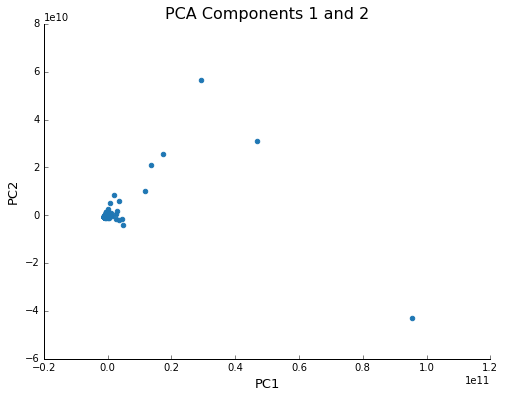

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Pretty colors    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
  
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  


# fit PCA to data using 2 components. Each row will be a feature and 
# each column will be a principal component
pca = PCA(n_components=2)
pca.fit(df)
# transform original data so that each row is a country and each column is a principal component
pca_transform = pca.transform(df)
# store the first component into X list
pc1 = [item[0] for item in pca_transform]
# store the second component into Y list
pc2 = [item[1] for item in pca_transform]
# country names
countries = [country for country in df.index.values]

# plot
plt.figure(figsize=(8, 6)) 
plt.scatter(pc1, pc2, color=tableau20[0])

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.title("PCA Components 1 and 2", fontsize = 16)
plt.xlabel("PC1", fontsize = 13)
plt.ylabel("PC2", fontsize = 13)  

### Part B

The 6 outliers are:
```
1. China
2. Mexico
3. Canada
4. Japan
5. Germany
6. South Korea
```

In [5]:
# Assign index to country using enumerate and sort by the score of each country
x_index = sorted(list(enumerate(pc1)),key=lambda tup: tup[1],reverse=True)

for index, item in x_index[:6]:
    print countries[index]

China
Mexico
Canada
Japan
Germany
Korea, South


### Part C

We plotted the percentage of total U.S. imports by the loading of PC1. The percentages of total U.S. imports for each good did not use standardized numbers in order to observe the effect of the true percentages.

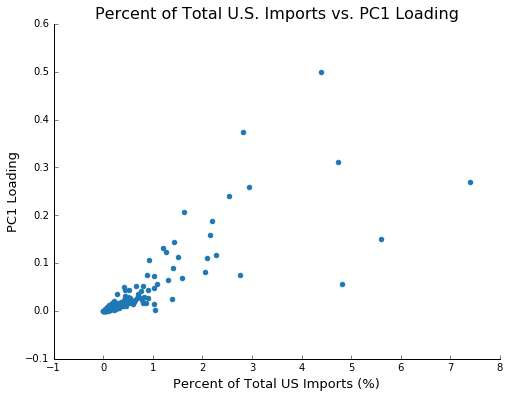

In [6]:
loadings_pc1 = pca.components_[0]
import_perc_df = 100*df.apply(sum) / sum(df.apply(sum))

plt.figure(figsize=(8, 6)) 

plt.scatter(import_perc_df,loadings_pc1, color=tableau20[0])

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

ax.set_xlim(-1,8)

plt.title("Percent of Total U.S. Imports vs. PC1 Loading", fontsize = 16)
plt.xlabel("Percent of Total US Imports (%)", fontsize = 13)
plt.ylabel("PC1 Loading", fontsize = 13)


### Part D

The 4 groups with the highest loadings in PC1 (the number is the percent of US imports the group accounts for) are:

```
Cell phones and other household goods, n.e.c.: Loading - 0.5, % Imports - 4.39%
Computers: Loading - 0.37, % Imports - 2.81%
Other parts and accessories of vehicles: Loading - 0.31, % Imports - 4.73%
Passenger cars, new and used: Loading - 0.27, % Imports - 7.39%
```

We believe that PC1 may represent electronic and consumer products. The correlation between the percent of total US imports and loading from PC1 is ```0.797```, which suggests that the component partially represents the goods that have the highest volume of trading. However, because the correlation among the points is lower for goods with volume above 4%, volume cannot be the only explanation for PC1's loadings. What the top 4 goods with the highest loadings of PC1 have in common is that they are all electronic or consumer products. 


In [8]:
top_5_pc1 = sorted(list(enumerate(loadings_pc1)), key=lambda tup:tup[1], reverse=True)[:4]
goods = [item for item in df.columns.values]

for key, item in top_5_pc1:
    print "{}: Loading - {}, % Imports - {}%".format(goods[key], round(item,2), round(import_perc_df.iloc[key],2))
    
print "\n",\
    "Correlation between % of total imports and PC1 weights: {:.3f}".format\
    (np.corrcoef(import_perc_df,loadings_pc1)[1][0])

Cell phones and other household goods, n.e.c.: Loading - 0.5, % Imports - 4.39%
Computers: Loading - 0.37, % Imports - 2.81%
Other parts and accessories of vehicles: Loading - 0.31, % Imports - 4.73%
Passenger cars, new and used: Loading - 0.27, % Imports - 7.39%

Correlation between % of total imports and PC1 weights: 0.797


# Question 4: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the [King County House Sales](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original) data, your goal is to build a Bokeh visualization which allows the user explore how price varies with living room size and year built. You will create a visualization that allows the user to toggle the X axis of a scatter plot between living room size and year built, with the y-axis always being price. Also add the hover tool so that if the user hovers over a datapoint in the living-room-size plot a window pops up that shows year built - and vice versa.

Hints: 
1. You can make use of Select widgets.
2. See: http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#javascript-callbacks. Specifically look at the CustomJS for Widgets under Callbacks and the Select widget. 
3. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for a hover tool example.
4. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
5. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
6. Use output_notebook() from Bokeh to output the plot to your notebook

In [ ]:
import pandas as pd 
from bokeh.plotting import figure, output_file, output_notebook, show, ColumnDataSource
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import HoverTool, NumeralTickFormatter

kc_data = pd.read_csv("kc_house_data.csv")

# Create dataframe of price, sqft_living, and yr_built
kc_data_bokeh = kc_data[['price','sqft_living','yr_built']]
X1 = list(kc_data['sqft_living']/1000)
X2 = list(kc_data['yr_built'])
Y = list(kc_data['price']/1000000)

In [ ]:
output_notebook()
output_file("Question 4.html")

source = ColumnDataSource(
        data=dict(
            sqft=X1,
            Y_=Y,
            yr_built=X2,
        )
    )

hover1 = HoverTool(
        tooltips=[
            ("Year Built:", "@yr_built")
        ]
    )

hover2 = HoverTool(
        tooltips=[
            ("Sq. Ft:","@sqft")
        ]
    )

p1 = figure(width=300, height=300,tools=[hover1],title = "Sq. Feet vs. Price")
p2 = figure(width=300, height=300,tools=[hover2],title="Year Built vs. Price")

p1.scatter(x='sqft',y='Y_', source=source)
p2.scatter(x='yr_built',y='Y_', source=source)

p1.xaxis.axis_label = "Sq. Feet (in '000)"
p1.yaxis.axis_label = "Price (in MM)"

p2.xaxis.axis_label = "Year Built"
p2.yaxis.axis_label = "Price (in MM)"

p1.yaxis[0].formatter = NumeralTickFormatter(format="0")

tab1 = Panel(child=p1, title = 'Sq. Feet of Living Room')
tab2 = Panel(child=p2, title="Year Built")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

# Question 5: Ridge and Lasso Regression (6+6+4+4=20 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is Hitters.csv (available on canvas), which contains performance records and salaries for baseball players. More information on the data can be found [here](https://rdrr.io/cran/ISLR/man/Hitters.html). There are 17 variables: first 16 columns are performance related features and the last column is for Salary. We
wish to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Note: lambda is called alpha in sklearn.

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:
```
    import numpy as np

    alphas =  10\***np.linspace(10,-2,100)*\*0.5
```
    Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each.
4. Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:
```
    LassoCV(alphas=None, cv=10, max_iter=10000)
```
    Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 16 variables. What do you observe from these coefficients?

### Part 1

Based on 5-fold cross-validation, the best $\lambda$ values are:

```
Best Ridge lambda: 1424.018
Best LASSO lambda: 28.612
```

Our steps were:
1. Split data into training-test (70-30 split)
2. Perform 5-fold CV on training set for each value of $\lambda$ between $10^{-2}$ to $10^{10}$
3. Record the average RMSE of 5-fold CV for each $\lambda$
4. The $\lambda$ with the lowest average RMSE is the best one.

In [9]:
from sklearn.cross_validation import train_test_split
from patsy import dmatrices
from sklearn.linear_model import Lasso,LassoCV,Ridge, LinearRegression
from sklearn.model_selection import KFold

import numpy as np

hitters = pd.read_csv("Hitters.csv")

# Get indexes of predictor variables
columns = list(enumerate(hitters.columns.values))
predictor_index = [tup[0] for tup in columns if tup[1] != 'Salary']

# Split target and predictors
target = hitters['Salary']
predictors = hitters.iloc[:,predictor_index]

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Split test and training data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

alphas =  10**np.linspace(10,-2,100)*0.5

ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)

kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)

# mse helper
def mse_calc(train, test):
    return (np.mean((train-test)**2))

# Ridge - calculate RMSE for each fold and each alpha to determine best lambda
ridge_score = []

for alpha in alphas:
    cv_ridge = []
    for train,test in kf.split(X_train):

        ridge = Ridge(random_state=42, alpha=alpha)
        ridge.fit(X_train.iloc[train], Y_train.iloc[train])

        yhat_ridge = ridge.predict(predictors.iloc[test])
        y_actual = target[test]

        cv_ridge.append(mse_calc(yhat_ridge,y_actual))
    
    ridge_score.append((alpha,np.mean(cv_ridge)))
    
# LASSO - calculate RMSE for each fold and each alpha to determine best lambda
lasso_score = []

for alpha in alphas:
    cv_lasso = []
    for train,test in kf.split(X_train):

        lasso = Lasso(random_state=42, alpha=alpha)
        lasso.fit(X_train.iloc[train], Y_train.iloc[train])

        yhat_lasso = lasso.predict(predictors.iloc[test])
        y_actual = target[test]

        cv_lasso.append(mse_calc(yhat_lasso,y_actual))
    
    lasso_score.append((alpha,np.mean(cv_lasso)))
    
# Store best values of lambda for Ridge and LASSO based on the lowest RMSE
best_lambda_ridge = sorted(ridge_score, key = lambda x: x[1])[0][0]
best_lambda_lasso = sorted(lasso_score, key = lambda x: x[1])[0][0]

/Applications/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [11]:
print "Best Ridge lambda: {:.3f}".format(best_lambda_ridge)
print "Best LASSO lambda: {:.3f}".format(best_lambda_lasso)

Best Ridge lambda: 1424.018
Best LASSO lambda: 28.612


### Part 2

For both Ridge and Lasso, when the regularization parameter $\lambda$ increases, the value of the coefficients decrease. Some coefficients decrease faster than others. However, in Ridge, the coefficients approach 0 as $\lambda$ increases from $10^4$ to $10^{10}$. In Lasso, the coefficients begin to become zero from $\lambda = 10^2$.

The values of $\lambda$ were not calculated using 5-fold CV here. We just calculated the coefficients from fitting the model to the training data.

In [14]:
# Store coefficients for ridge and lasso in lists. These will be our y-values in the plots
coef_ridge = []
coef_lasso = []

for alpha in alphas:

    # Calculate coefficients for ridge 
    ridge = Ridge(random_state=42, alpha=alpha)
    ridge.fit(X_train, Y_train)
        
    coef_ridge.append(ridge.coef_)

    # Calculate coefficients for lasso
    lasso = Lasso(random_state=42, alpha=alpha)
    lasso.fit(X_train, Y_train)
        
    coef_lasso.append(lasso.coef_)


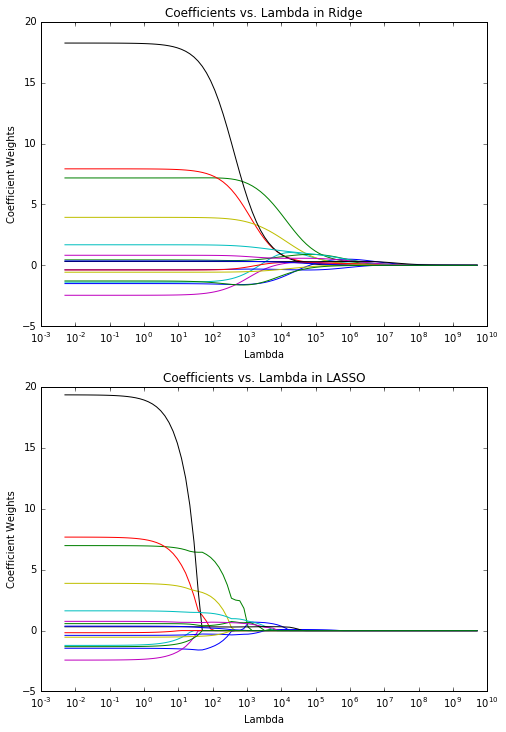

In [17]:
plt.figure(figsize=(8,12))

# Ridge
plt.subplot(211)

plt.plot(alphas, coef_ridge)
plt.xscale('log')
plt.xlim(ax1.get_xlim()[::-1])  # reverse axis

plt.title("Coefficients vs. Lambda in Ridge")
plt.xlabel("Lambda")
plt.ylabel("Coefficient Weights")

# Lasso
plt.subplot(212)

plt.plot(alphas, coef_lasso)
plt.xscale('log')
# plt.xlim(ax2.get_xlim()[::-1]) 

plt.title("Coefficients vs. Lambda in LASSO")
plt.xlabel("Lambda")
plt.ylabel("Coefficient Weights")

plt.show()

### Part 3

Here are the MSE results from OLS, Ridge, and LASSO regressions using only the training data:

```
OLS Test Error: 150074.549
LASSO Test Error: 145946.110
Ridge Test Error: 144860.636
```

We used the best values of lambda calculated in Parts 1 and 2. Our lowest MSE came from the Ridge model, followed by the LASSO model. The OLS model performed the worst.

In [18]:
linear = LinearRegression()
ridge_3 = Ridge(random_state=42, alpha=best_lambda_ridge)
lasso_3 = Lasso(random_state=42, alpha=best_lambda_lasso)

# Fit linear model to training data
linear.fit(X_train, Y_train)
yhat_linear = linear.predict(X_test)

# Fit Ridge model to training data
ridge_3.fit(X_train, Y_train)
yhat_ridge = ridge_3.predict(X_test)

# Fit LASSO model to training data
lasso_3.fit(X_train, Y_train)
yhat_lasso = lasso_3.predict(X_test)

print "OLS Test MSE: {:.3f}".format(mse_calc(yhat_linear, Y_test))
print "Ridge Test MSE: {:.3f}".format(mse_calc(yhat_ridge, Y_test))
print "LASSO Test MSE: {:.3f}".format(mse_calc(yhat_lasso, Y_test))

OLS Test MSE: 150074.549
Ridge Test MSE: 144860.636
LASSO Test MSE: 145946.110


### Part 4

The best $\lambda$ based on the LASSO formula below is ```4409.126```

```
LassoCV(alphas=None, cv=10, max_iter=10000)
```

The coefficients from this model are:

```
AtBat: 0.610
PutOuts: 0.323
CRBI: 0.246
CRuns: 0.225
CHits: 0.081
Hits: 0.000
HmRun: 0.000
Runs: 0.000
RBI: 0.000
Walks: 0.000
Years: -0.000
CAtBat: 0.000
CHmRun: 0.000
CWalks: 0.000
Assists: -0.000
Errors: -0.000
```
We noticed that only 5 of the 16 coefficients had values not equal to 0.

In [19]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)

lasso_cv.fit(X_train, Y_train)
best_lambda_lasso_4 = lasso_cv.alpha_

coef_values = lasso_cv.coef_
features = X_train.columns.values

features_coef = [(features[i], coef_values[i]) for i in range(len(features))]

print "Best lambda, LASSO: {:.3f}".format(best_lambda_lasso_4), '\n'

for tup in sorted(features_coef, key=lambda tup: tup[1], reverse=True):
    print "{}: {:.3f}".format(tup[0], tup[1])

Best lambda, LASSO: 4409.126 

AtBat: 0.610
PutOuts: 0.323
CRBI: 0.246
CRuns: 0.225
CHits: 0.081
Hits: 0.000
HmRun: 0.000
Runs: 0.000
RBI: 0.000
Walks: 0.000
Years: -0.000
CAtBat: 0.000
CHmRun: 0.000
CWalks: 0.000
Assists: -0.000
Errors: -0.000


# Question 6: Shiny app using R (10 points)

In this problem, you'll build a Shiny application. Shiny is an R
package which lets you publish web applications from R easily. For
more information on Shiny, see http://shiny.rstudio.com. The problem
statement is as follows:

We are going to use the "WorldPhones" dataset available in
"datasets" package. This dataset shows the number of
telephones (in thousands) in various regions of the world in
different years. The dataset will be loaded into a variable named
"WorldPhones" once you include the datasets
package (library(datasets)). Your goal is to build a Shiny
app which allows the user to visualize the distribution of the
number of telephones by region and by year (using bar graph). The
requirements are as follows:


1. You will give the user the option to choose between "Region" and
"Year". Use [check-box](http://shiny.rstudio.com/reference/shiny/latest/checkboxGroupInput.html) to get the user option. The default
option should be "Region".
2. You will also give the user the ability to choose between different regions and years. (Hint: You can make use of drop-down lists)
3. Plot a bargraph of the feature chosen by the user. For example, if the user
selects "Region" using the check-box, and then selects
"Asia" from the drop-down list of "Region",
you need to plot a bar graph showing the number of telephones in
Asia in various years. Similarly, if the user selects
"Year" using the check-box, and then selects
"1951" from the drop-down list of "Year", you
need to plot a bar graph showing the number of telephones in 1951 in
various regions. Note that if the user selects both Region and Year
(using the check-boxes), the app will work as if only the Region has
been selected.


We have made available sample screenshots of our Shiny app that
supports the above requirements, namely $shiny1.png$ and
$shiny2.png$ (available on canvas). Your interface should look
similar to the screenshots.


The tutorials listed below should provide you the needed background
to solve this problem:

1. http://shiny.rstudio.com/tutorial/lesson1
2. http://shiny.rstudio.com/gallery/
3. http://shiny.rstudio.com/reference/shiny/latest/checkboxGroupInput.html

You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. 